# <div style="color:red;display:inline-block;border-radius:5px;background-color:#FAF3E0;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:red;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b>Introduction</p></div>

The provided dataset serves as the foundation for a comprehensive study titled "Water Intensity Benchmarks for Sustainable Retail Stores". This research delves into the water consumption patterns of leading revenue-generating retailers, focusing on crucial variables such as Water Intensity (WI), Company, Country of Origin, Dominant Operational Category, Store Typology, and several others.

The study conducts a meticulous WI benchmark analysis, pinpointing key statistics including averages, minimums, and maximums for both food and non-food retail sub-types. Outliers, detected through the interquartile range, were meticulously eliminated to enhance precision within each category. Additionally, a rigorous linear regression analysis was executed for retail sub-types with data from three or more retailers. This analysis aimed to unveil the intricate relationship between WI (as the dependent variable) and various independent variables. Notably, R-squared values (R²) were calculated for each independent variable, highlighting those with a substantial impact on the prediction of WI, boasting scores exceeding 0.7.

### 🔘 Description:

    🔵 This dataset contains information pertaining to top revenue-generating retailers as part of the research paper titled "Water Intensity Benchmarks for Sustainable Retail Stores."
  
    🔵 The data focuses on variables including water intensity, company details, country of origin, operational category, store typology, and various other key metrics.

### 🔘 Variables:

  1. Retail revenue rank (FY16)
  2. Company
  3. Country of origin
  4. Dominant operational category
  5. Store typology
  6. Number of countries of operation
  7. FY2015 retail revenue (US$M)
  8. Number of stores
  9. Average store sales area in m²
  
  10. Total store sales area in m²
  11. Water intensity in l/m²/y
  12. Average number of workers per store
  13. Total number of workers
  14. Revenue per store sales area in $/m²/y




# <div style="color:red;display:inline-block;border-radius:5px;background-color:#FAF3E0;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:red;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b> Import Libraries</p></div>


In [1]:
%%capture
!pip install dabl

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from matplotlib import style
style.use("ggplot")

import dabl

from warnings import filterwarnings
filterwarnings("ignore")


# <div style="color:red;display:inline-block;border-radius:5px;background-color:#FAF3E0;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:red;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b>Load the Dataset</p></div>


In [3]:
# Read the Excel file
df = pd.read_excel('/kaggle/input/sustainable-retail-water-benchmarks/water intensity_final 05.xlsx')
df.head().style.set_properties(**{'background-color':'lightgreen','color':'black','border-color':'#8b8c8c'})

,Retail revenue rank (FY16) [1],Company [1],Country of origin,Dominant operational category [1],Store typology,Number of countries of operation [1],FY2015 retail revenue (US$M) [1],Number of stores,Average store sales area in m2,Total store sales area in m2,Water intensity in l/m²/y,Average number of workers per store,Total number of workers,Revenue per store sales area in $/m2/y
0,1,Wal-Mart Stores Inc. (WMR),U.S.,Hypermarket / Supercenter / Superstore,Food,30.000000,482.130000,5200.000000,11067.128968,57549070.631970,nan,174.007692,904840.000000,8377.720000
1,1.010000,Wal-Mart Stores Inc. (WMR),nan,Supercenter,Food,nan,nan,2300.000000,17379.182156,39972118.959108,nan,250,575000.000000,nan
2,1.020000,Wal-Mart Stores Inc. (WMR),nan,Discount store,Food,nan,nan,1000.000000,9944.237918,9944237.918216,nan,225,225000.000000,nan
3,1.030000,Wal-Mart Stores Inc. (WMR),nan,Wal-Mart neighborhood markets,Food,nan,nan,120.000000,3903.345725,468401.486989,nan,95,11400.000000,nan
4,1.040000,Wal-Mart Stores Inc. (WMR),nan,Sam's club warehouse,Food,nan,nan,584.000000,12267.657993,7164312.267658,nan,160,93440.000000,nan


# <div style="color:red;display:inline-block;border-radius:5px;background-color:#FAF3E0;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:red;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b>Data Preprocessing</p></div>

### 🔘 Handle Missing Values:

    🔵 Check for missing values in the dataset and decide how to handle them.

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Retail revenue rank (FY16) [1]             56
Company [1]                                67
Country of origin                         132
Dominant operational category [1]          11
Store typology                             70
Number of countries of operation [1]      207
FY2015 retail revenue (US$M) [1]          207
Number of stores                          128
Average store sales area in m2            205
Total store sales area in m2              200
Water intensity in l/m²/y                 224
Average number of workers per store       317
Total number of workers                   215
Revenue per store sales area in $/m2/y    255
dtype: int64


# <div style="color:red;display:inline-block;border-radius:5px;background-color:#FAF3E0;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:red;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b>Missing Values Analysis</p></div>

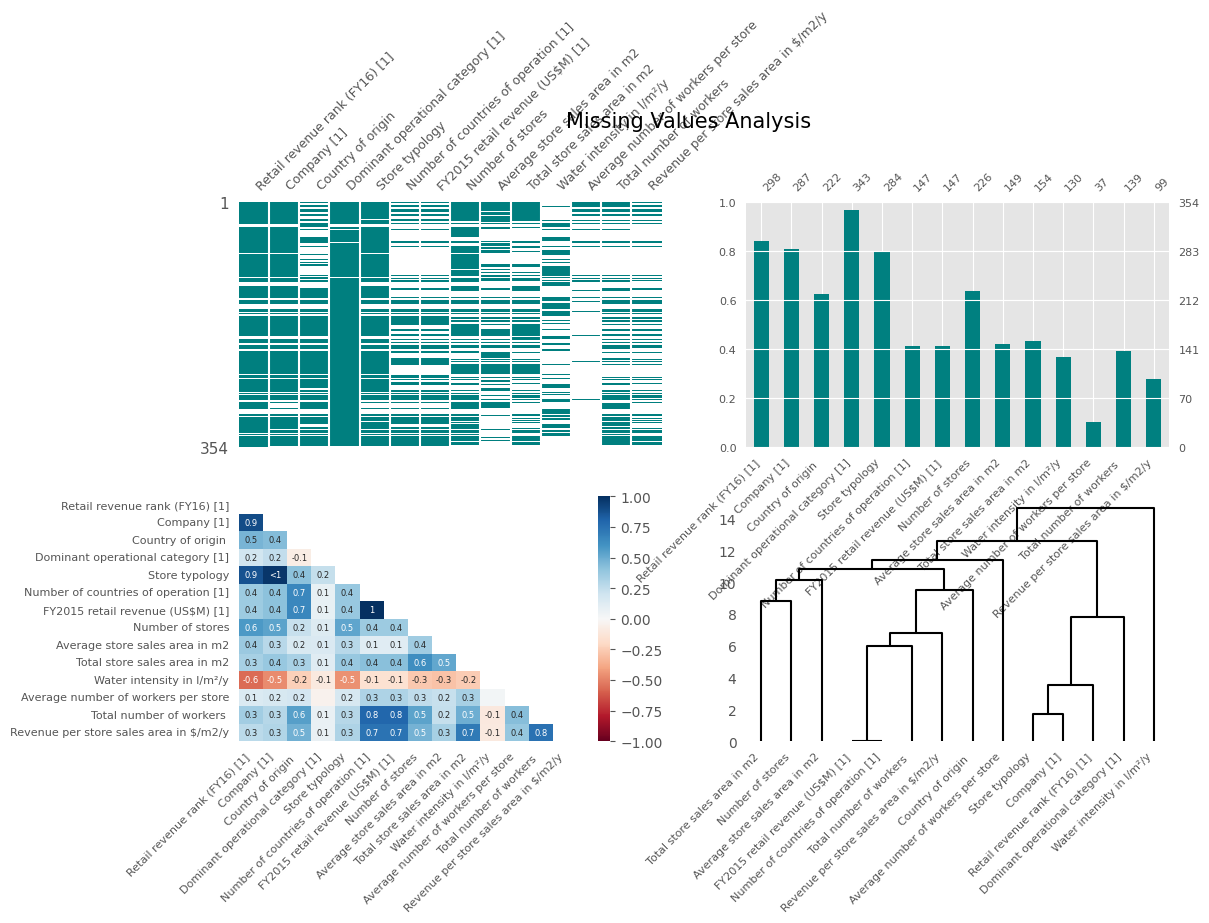

In [5]:
import missingno as msno

fig, ax = plt.subplots(2,2,figsize=(12,7))
axs = np.ravel(ax)
msno.matrix(df,  fontsize=9, color=(0, 0.5, 0.5),ax=axs[0]);
msno.bar(df, fontsize=8, color=(0, 0.5, 0.5), ax=axs[1]);
msno.heatmap(df,fontsize=8,ax=axs[2]);
msno.dendrogram(df,fontsize=8,ax=axs[3], orientation='top')

fig.suptitle('Missing Values Analysis', y=1.01, fontsize=15);

In [6]:
df.fillna(0, inplace=True)

In [7]:
df_no_na = df.fillna(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Retail revenue rank (FY16) [1]          354 non-null    object 
 1   Company [1]                             354 non-null    object 
 2   Country of origin                       354 non-null    object 
 3   Dominant operational category [1]       354 non-null    object 
 4   Store typology                          354 non-null    object 
 5   Number of countries of operation [1]    354 non-null    float64
 6   FY2015 retail revenue (US$M) [1]        354 non-null    float64
 7   Number of stores                        354 non-null    float64
 8   Average store sales area in m2          354 non-null    object 
 9   Total store sales area in m2            354 non-null    object 
 10  Water intensity in l/m²/y               354 non-null    object

In [9]:
print("Shape of Benchmark Data:", df.shape)

Shape of Benchmark Data: (354, 14)


In [10]:
print("Number of duplicates in Benchmark Data:", df.duplicated().sum())

Number of duplicates in Benchmark Data: 0


In [11]:
#df.drop_duplicates()

In [12]:
df.columns

Index(['Retail revenue rank (FY16) [1]', 'Company [1]', 'Country of origin ',
       'Dominant operational category [1]', 'Store typology',
       'Number of countries of operation [1]',
       'FY2015 retail revenue (US$M) [1]', 'Number of stores',
       'Average store sales area in m2', 'Total store sales area in m2',
       'Water intensity in l/m²/y', 'Average number of workers per store',
       'Total number of workers ', 'Revenue per store sales area in $/m2/y'],
      dtype='object')

# <div style="color:red;display:inline-block;border-radius:5px;background-color:#FAF3E0;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:red;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b>Exploratory Data Analysis</p></div>

    🔵 Perform exploratory data analysis on the dataset, including visualizations and statistical analysis
    
    🔵 Explore the relationship between the features and the target variable (FY2015 retail revenue (US$M)

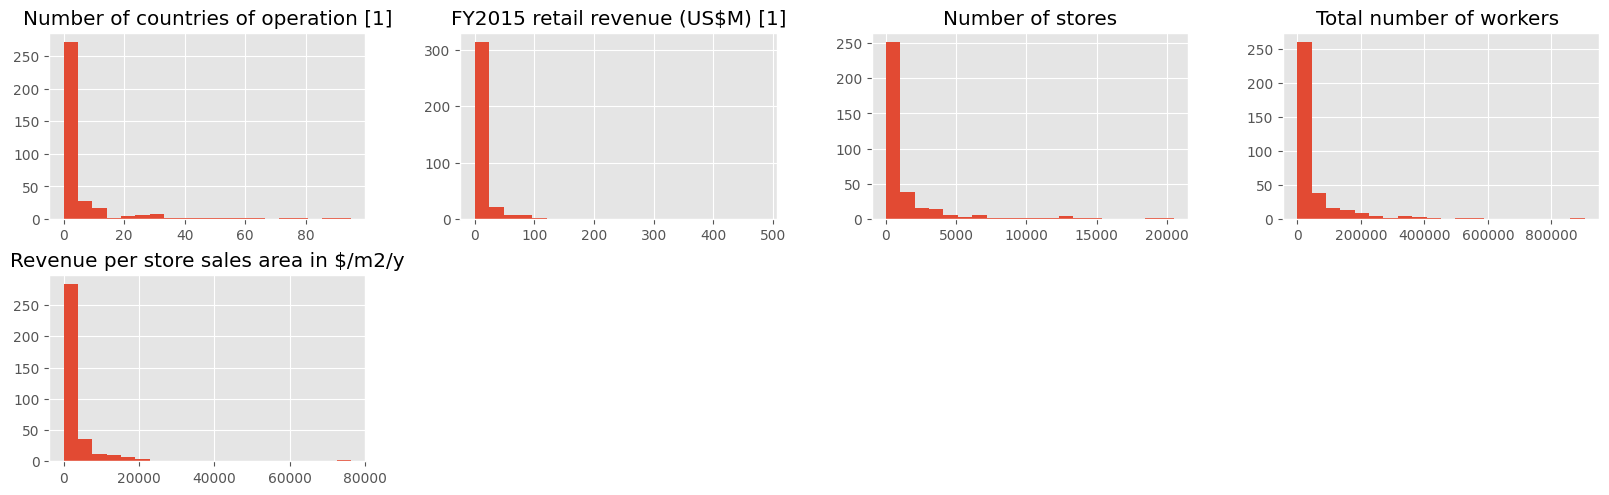

In [13]:
df.hist(layout=(5,4),figsize=(20,15),bins=20)
plt.show()

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='Retail revenue ra...', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=4.77E-01'}, xlabel='Number of countries of operation [1]', ylabel='Retail revenue ra...'>,
         <Axes: title={'center': 'F=-3.70E-01'}, xlabel='Water intensity in l/m²/y_dabl_continuous'>,
         <Axes: title={'center': 'F=3.21E-01'}, xlabel='Total number of workers '>,
         <Axes: title={'center': 'F=3.16E-01'}, xlabel='FY2015 retail revenue (US$M) [1]'>],
        [<Axes: title={'center': 'F=2.63E-01'}, xlabel='Revenue per store sales area in $/m2/y', ylabel='Retail revenue ra...'>,
         <Axes: title={'center': 'F=2.38E-01'}, xlabel='Number of stores'>,
         <Axes: title={'center': 'F=-1.83E-01'}, xlabel='Average number of workers per store_dabl_contin...'>,
         <Axes: title={'center': 'F=1.27E-01'}, xlabel='Total store sales area in m2_dabl_continuous'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=6.31E-01'}, x

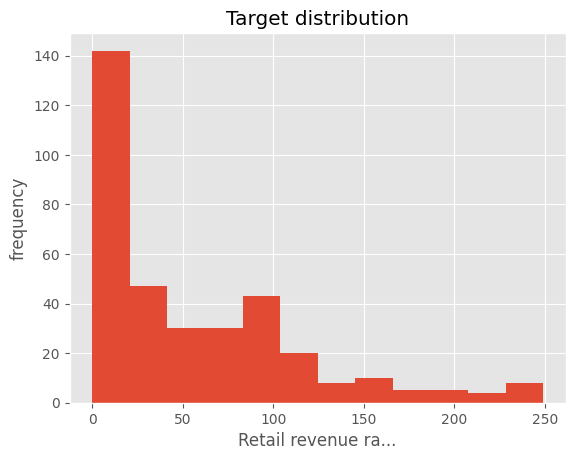

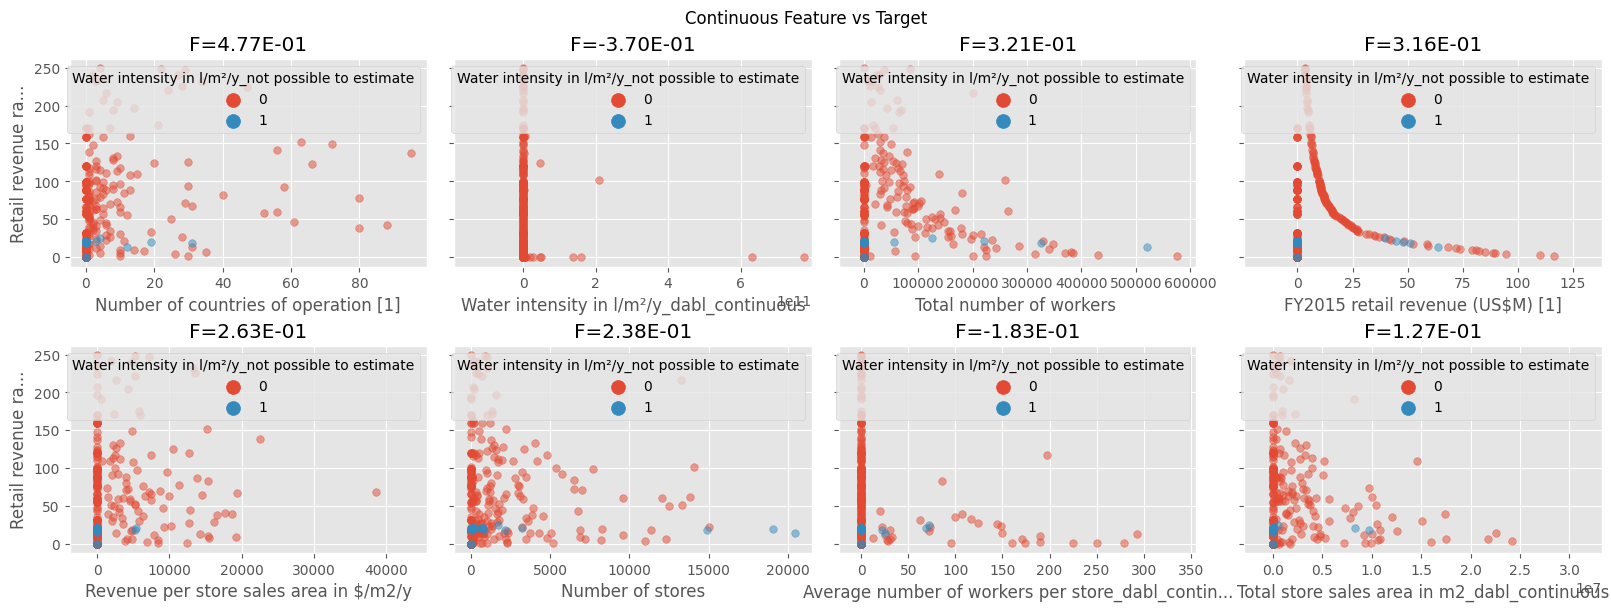

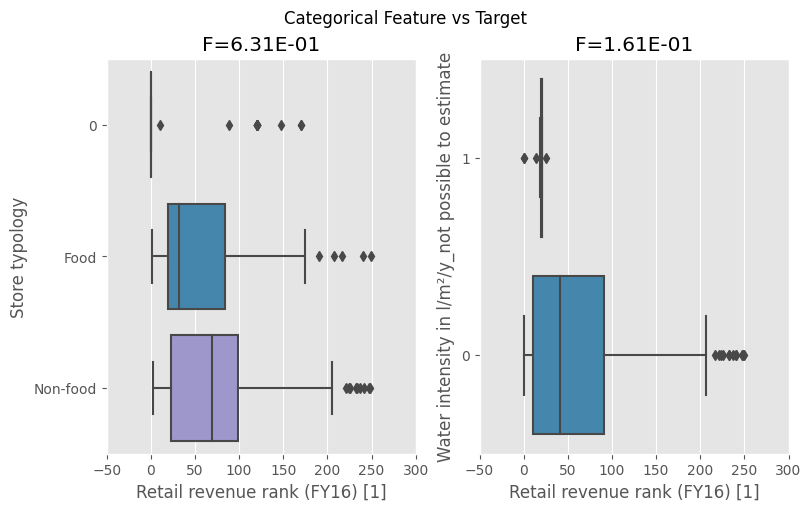

In [14]:
dabl.plot(df,target_col="Retail revenue rank (FY16) [1]")

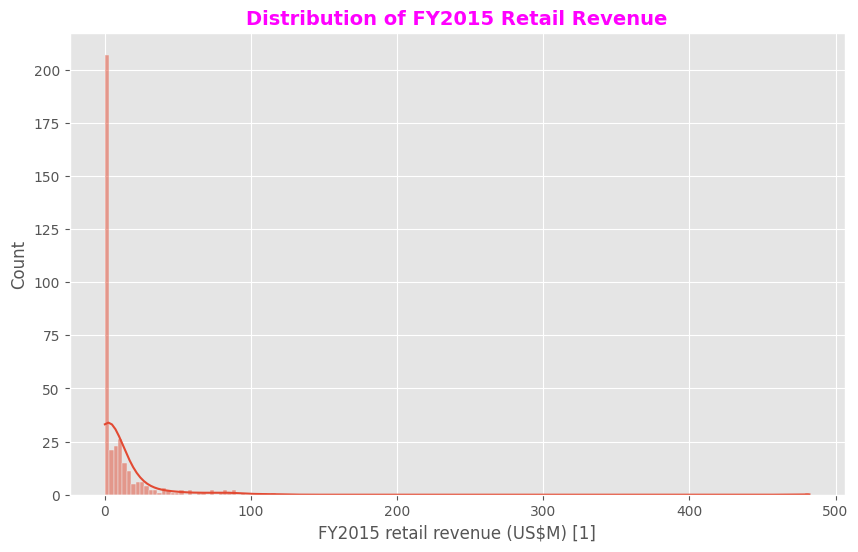

In [15]:
# Visualize the distribution of a numerical variable (e.g., FY2015 retail revenue)
plt.figure(figsize=(10, 6))
sns.histplot(df['FY2015 retail revenue (US$M) [1]'], kde=True)
plt.title('Distribution of FY2015 Retail Revenue', fontsize = 14, fontweight = 'bold', color = 'magenta')
plt.savefig('Distribution of FY2015 Retail Revenue.png')
plt.show()

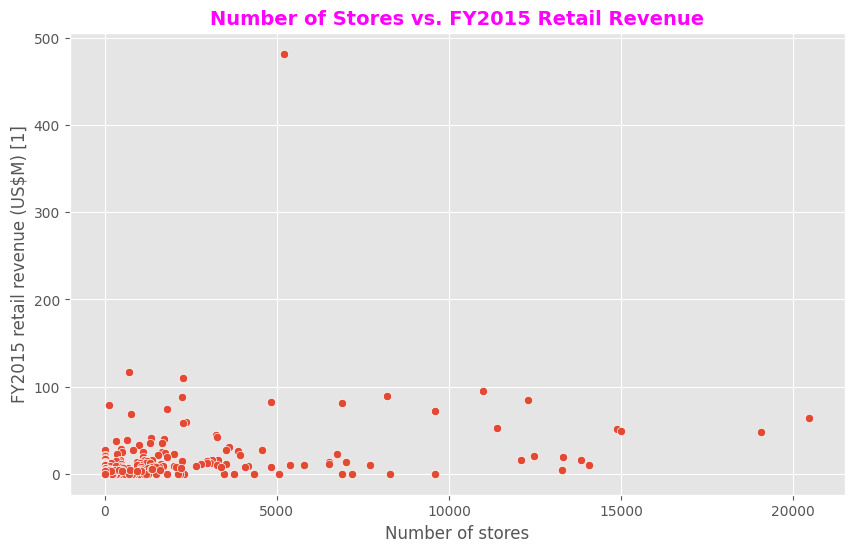

In [16]:
# Visualize relationships between variables (e.g., revenue vs. number of stores)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number of stores', y='FY2015 retail revenue (US$M) [1]',data=df)
plt.title('Number of Stores vs. FY2015 Retail Revenue', fontsize = 14, fontweight = 'bold', color = 'magenta')
plt.savefig('Number of stores vs. FY2015 retail revenue.png')
plt.show()


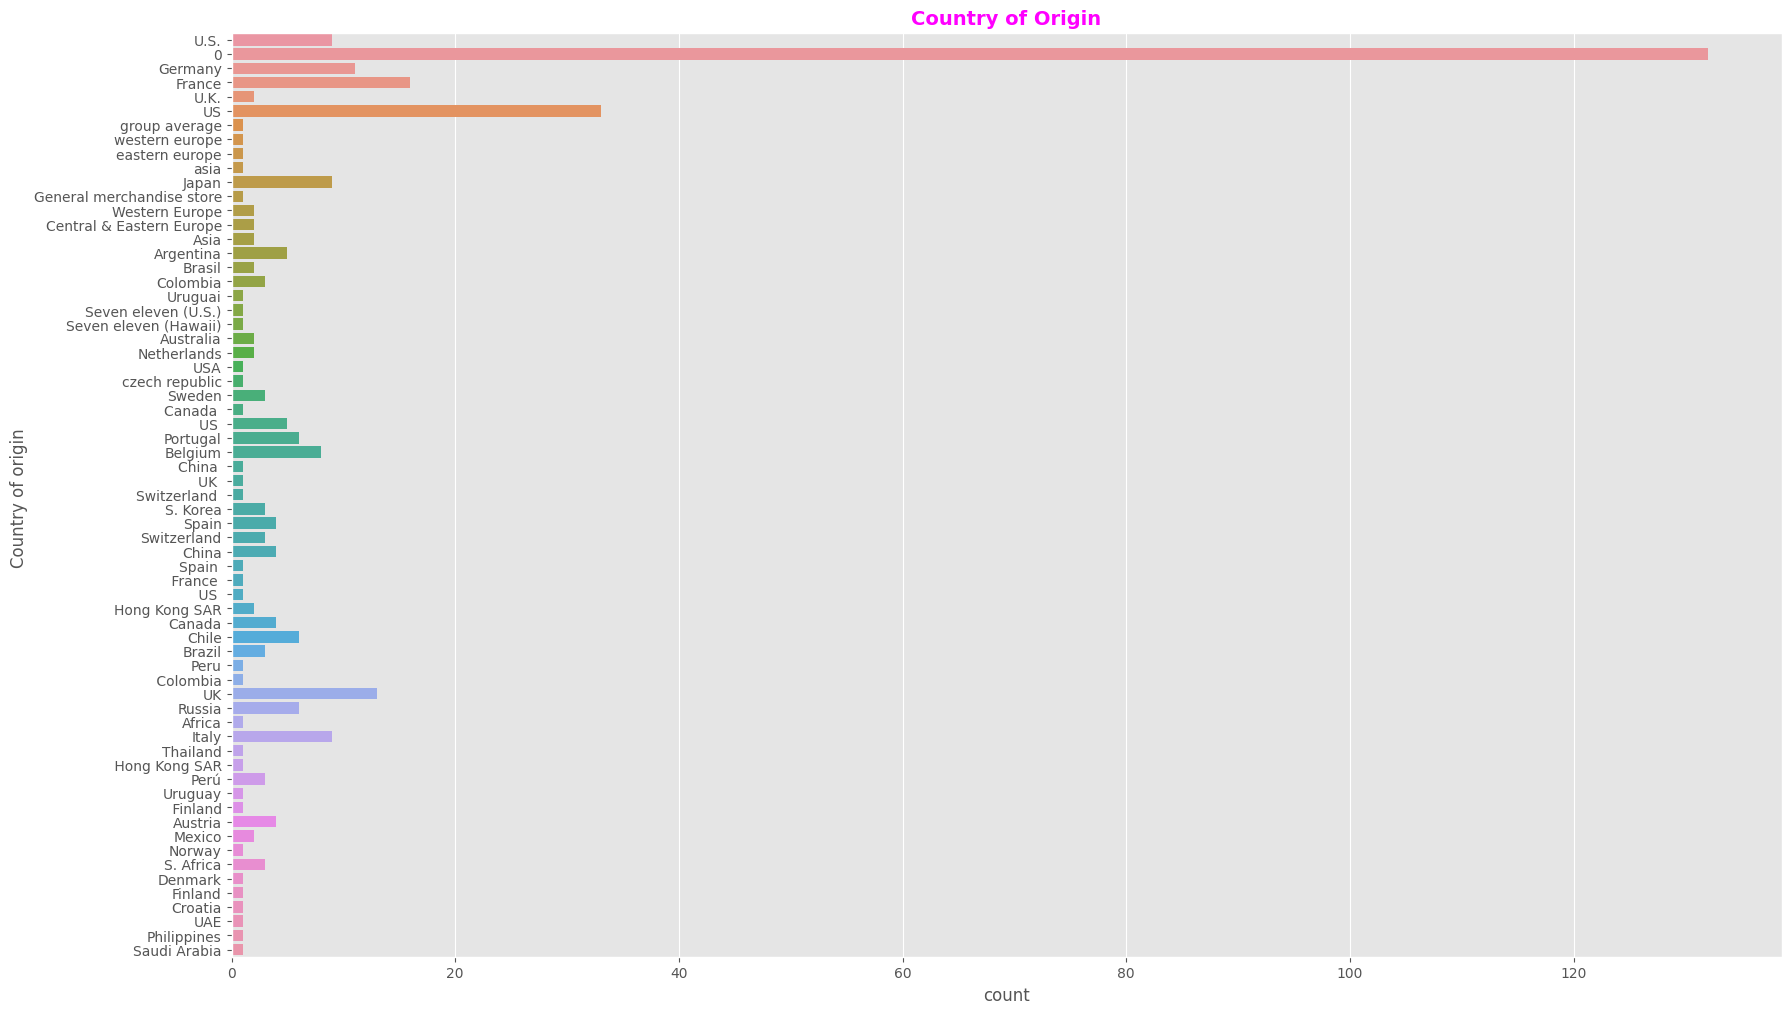

In [17]:
# Explore categorical variables (e.g., Country of origin)
plt.figure(figsize=(20, 12))
sns.countplot(y='Country of origin ', data=df)
plt.title('Country of Origin', fontsize = 14, fontweight = 'bold', color = 'magenta')
plt.savefig('Country of Origin.png')
plt.show()


In [18]:
df.describe().style.background_gradient(cmap='tab20c')

,Number of countries of operation [1],FY2015 retail revenue (US$M) [1],Number of stores,Total number of workers,Revenue per store sales area in $/m2/y
count,354.000000,354.000000,354.000000,354.000000,354.000000
mean,5.714689,10.396302,1419.434234,44916.234463,2624.365618
std,14.244544,31.207201,3041.330574,97521.018438,7934.852793
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,165.500000,0.000000,0.000000
75%,4.000000,10.612000,1291.000000,52355.250000,2136.528548
max,95.000000,482.130000,20476.000000,904840.000000,76238.034864


# <div style="color:red;display:inline-block;border-radius:5px;background-color:#FAF3E0;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:red;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b>Categorical Variable Analysis</p></div>


In [19]:
# 3. Categorical Variable Analysis
categorical_vars = ['Country of origin ', 'Dominant operational category [1]', 'Store typology']
for var in categorical_vars:
    print(f"\nFrequency table for {var}:")
    print(df[var].value_counts())



Frequency table for Country of origin :
Country of origin 
0               132
US               33
France           16
UK               13
Germany          11
               ... 
UK                1
Spain             1
 France           1
 US               1
Saudi Arabia      1
Name: count, Length: 65, dtype: int64

Frequency table for Dominant operational category [1]:
Dominant operational category [1]
Supermarket                    45
Other Specialty                17
Apparel/ Footwear Specialty    13
Discount Store                 13
Department Store               11
                               ..
KMAT department store           1
Tyre and autoshop               1
Furniture and decoration        1
Retail                          1
 Discount Store                 1
Name: count, Length: 181, dtype: int64

Frequency table for Store typology:
Store typology
Food        170
Non-food    114
0            70
Name: count, dtype: int64


# <div style="color:red;display:inline-block;border-radius:5px;background-color:#FAF3E0;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:red;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b>Chi-Square Tests</p></div>


In [20]:
# Perform Chi-Square tests for associations (example with 'Country of origin')
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Country of origin '], df['Dominant operational category [1]'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")



Chi-Square Statistic: 7121.505315526452
P-Value: 1.0


# <div style="color:red;display:inline-block;border-radius:5px;background-color:#FAF3E0;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:red;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b> </b>ANOVA</p></div>


In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# The'Dominant operational category [1]' is categorical and 'FY2015 retail revenue (US$M) [1]' is numerical
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('Q("FY2015 retail revenue (US$M) [1]") ~ Q("Dominant operational category [1]")', data=df).fit()
anova_table = anova_lm(model)

print("\nANOVA Table:")
print(anova_table)


ANOVA Table:
                                           df         sum_sq      mean_sq  \
Q("Dominant operational category [1]")  180.0  140998.104549   783.322803   
Residual                                173.0  202784.851736  1172.166773   

                                               F    PR(>F)  
Q("Dominant operational category [1]")  0.668269  0.996192  
Residual                                     NaN       NaN  


<div class="alert alert-block alert-info"> 📌 "If you have some time to spare, I invite you all,  to explore it further and consider creating a notebook based on your insights and analysis. Your contributions could offer valuable perspectives to our community. If you find the dataset interesting and your experience positive, your upvote would be greatly appreciated. Your support encourages further collaboration and knowledge sharing. Thank you for considering this opportunity!"😊 </div>